# Introduction

## Context

Sendy, in partnership with insight2impact facility, is hosting a Zindi challenge to predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination.

The solution will help Sendy enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

Sendy helps men and women behind every type of business to trade easily, deliver more competitively, and build extraordinary businesses.

## Problem Statement

Data is a critical component in helping Sendy to build more efficient, affordable and accessible solutions. Given the details of a Sendy order, can we use historic data to predict an accurate time for the arrival of the rider at the destination of a package? In this competition, we’re challenging you to build a model that predicts an accurate delivery time, from picking up a package to arriving at the final destination. An accurate arrival time prediction will help all businesses to improve their logistics and communicate an accurate time to their customers.

# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import data
train=pd.read_csv('Train.csv')
rider=pd.read_csv('Riders.csv')
train_set=train.merge(rider,how='left', on='Rider Id')
Test=pd.read_csv('Test.csv')

Test_final=Test.merge(rider,how='left', on='Rider Id')

In [3]:
train_set.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

## Data Structures

In [4]:
# Investigate and correctly format data structures 
X=train_set.drop('Time from Pickup to Arrival', axis=1)
y=train_set['Time from Pickup to Arrival']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [5]:
# Unique identifiers, Remove the columns.
# Vehicle type is also removed since it does not vary
X.drop(['Rider Id', 'Order No', 'User Id','Vehicle Type'], axis=1, inplace=True)
Test_final.drop(['Rider Id', 'Order No', 'User Id','Vehicle Type'], axis=1, inplace=True)

# Continous VariablesNo_Of_Orders                                  
                                 
* Age                                          
* Average_Rating                               
* No_of_Ratings 
* Distance (KM)     
* Time from Pickup to Arrival
* Precipitation

# Intarval
Temperature 
Placement - Day of Month                       
Placement - Weekday (Mo = 1)                   
Placement - Time                              
Confirmation - Day of Month                    
Confirmation - Weekday (Mo = 1)                
Confirmation - Time                          
Arrival at Pickup - Day of Month               
Arrival at Pickup - Weekday (Mo = 1)           
Arrival at Pickup - Time                      
Pickup - Day of Month                          
Pickup - Weekday (Mo = 1)                      
Pickup - Time                                
Arrival at Destination - Day of Month          
Arrival at Destination - Weekday (Mo = 1)      
Arrival at Destination - Time   


# Catagorical 
* Customer type: Personal or Business  and
* Platform Type
* Pickup Lat                                 
* Pickup Long                               
* Destination Lat                            
* Destination Long


# Ecoding Categorical variables


In [6]:
# The Destination Time, Days of the week and months of the day variables woll be dropped since,
# They are not in the test dataset and should not impact travel time, since someone is already arrived destination
X.drop(['Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Arrival at Destination - Time'],
        axis=1, inplace =True)
X.columns


Index(['Platform Type', 'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

In [7]:
X['Confirmation_Time']=np.nan
for i in range(len(X['Confirmation - Time'])):
    X['Confirmation_Time'][i]= str(X['Confirmation - Time'][i]).split(' ')[0]

X['Placement_Time']=np.nan
for i in range(len(X['Placement - Time'])):
    X['Placement_Time'][i]= str(X['Placement - Time'][i]).split(' ')[0]

X['Pickup_Time']=np.nan
for i in range(len(X['Pickup - Time'])):
    X['Pickup_Time'][i]= str(X['Pickup - Time'][i]).split(' ')[0]

X['Arrival_at_Pickup_Time']=np.nan
for i in range(len(X['Arrival at Pickup - Time'])):
    X['Arrival_at_Pickup_Time'][i]= str(X['Arrival at Pickup - Time'][i]).split(' ')


C:\Users\27784\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\27784\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\27784\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [8]:
def time_to_num(df,col):
    for i in range(len(df[col])):
        hh, mm , ss = map(int, str(df[col][i]).split(':'))
        df[col][i]=ss + 60*(mm + 60*hh)
    return df
        

In [9]:
X1=time_to_num(X,'Confirmation_Time')
X2=time_to_num(X1,'Placement_Time')
X3=time_to_num(X2,'Pickup_Time')
X=time_to_num(X3,'Arrival_at_Pickup_Time')

C:\Users\27784\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ValueError: invalid literal for int() with base 10: "['10"

In [10]:
X.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Confirmation_Time,Placement_Time,Pickup_Time,Arrival_at_Pickup_Time
0,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,-1.300406,36.829741,1637,1309,13.8,549,34810,34546,37650,"[10:04:47, AM]"
1,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,...,-1.295004,36.814358,396,339,13.6,69,41001,40576,42249,"[11:40:22, AM]"
2,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,...,-1.300921,36.828195,1023,242,12.5,114,45764,45565,46383,"[12:49:34, PM]"
3,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,...,-1.257147,36.795063,886,283,14.5,113,33965,33934,34986,"[9:37:56, AM]"
4,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,...,-1.295041,36.809817,2311,872,14.1,533,35778,35718,36323,"[10:03:53, AM]"


from datetime import datetime

for i in range(len(X['Pickup - Time'])):
        X['Arrival_at_Pickup_Time']=datetime.strptime(str(X['Arrival_at_Pickup_Time'][i]), '%H:%M:%S').time()
        X['Pickup_Time']=datetime.strptime(str(X['Pickup_Time'][i]), '%H:%M:%S').time()
        X['Confirmation_Time']=datetime.strptime(str(X['Confirmation_Time'][i]), '%H:%M:%S').time()
        X['Placement_Time']=datetime.strptime(str(X['Placement_Time'][i]), '%H:%M:%S').time()

In [11]:
X.drop(['Pickup - Time','Placement - Time','Confirmation - Time', 'Arrival at Pickup - Time'], axis=1,inplace=True)

In [12]:
# Customer type ( personal or business)
X['Platform Type']=X['Platform Type'].astype('object')

#Time
#X['Placement - Time(AM/PM)'] = ['AM' if 'AM' in x else 'PM' for x in X['Placement - Time']]
#X['Confirmation - Time(AM/PM)'] = ['AM' if 'AM' in x else 'PM' for x in X['Confirmation - Time']]
#X['Arrival At Pickup - Time(AM/PM)'] = ['AM' if 'AM' in x else 'PM' for x in X['Arrival at Pickup - Time']]
#X['Pickup - Time(AM/PM)'] = ['AM' if 'AM' in x else 'PM' for x in X['Pickup - Time']]

# Weekdays are also converted intto catergories, so that the impact of each day on travel time can be compared with other days.
X['Placement - Weekday (Mo = 1)']= X['Placement - Weekday (Mo = 1)'].astype('object')
X['Confirmation - Weekday (Mo = 1)']=X['Confirmation - Weekday (Mo = 1)'].astype('object')
X['Arrival at Pickup - Weekday (Mo = 1)']=X['Arrival at Pickup - Weekday (Mo = 1)'].astype('object')
X['Pickup - Weekday (Mo = 1)']=X['Pickup - Weekday (Mo = 1)'].astype('object')

In [13]:
# Drop the original time variable since, since catergorical variables for time are created
# Comparison will be done for afternoon and before noon (AM and PM)
#X.drop(['Placement - Time','Arrival at Pickup - Time','Confirmation - Time','Pickup - Time'],axis=1, inplace=True)

In [14]:
# Creating dummy variables from all the categorical variables in the dataset
X_dummies = pd.get_dummies(X,columns=['Placement - Weekday (Mo = 1)','Confirmation - Weekday (Mo = 1)',
                                     'Arrival at Pickup - Weekday (Mo = 1)','Pickup - Weekday (Mo = 1)',
                                     'Platform Type','Personal or Business'], drop_first=True)
len(X.columns)


25

In [15]:
X_dummies.columns

Index(['Placement - Day of Month', 'Confirmation - Day of Month',
       'Arrival at Pickup - Day of Month', 'Pickup - Day of Month',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Confirmation_Time', 'Placement_Time', 'Pickup_Time',
       'Arrival_at_Pickup_Time', 'Placement - Weekday (Mo = 1)_2',
       'Placement - Weekday (Mo = 1)_3', 'Placement - Weekday (Mo = 1)_4',
       'Placement - Weekday (Mo = 1)_5', 'Placement - Weekday (Mo = 1)_6',
       'Placement - Weekday (Mo = 1)_7', 'Confirmation - Weekday (Mo = 1)_2',
       'Confirmation - Weekday (Mo = 1)_3',
       'Confirmation - Weekday (Mo = 1)_4',
       'Confirmation - Weekday (Mo = 1)_5',
       'Confirmation - Weekday (Mo = 1)_6',
       'Confirmation - Weekday (Mo = 1)_7',
       'Arrival at Pickup - Weekday (Mo = 1)_2',
       'Arrival at Pickup - We

# Categorical

Coordinates:
Longitudes and Latitudes were used to calculate the distance between the two geographical points
The distance calculated is perfectly correlated with the Distance in the data, so thefore Longitude and Latitude variables
 with the calculated distance, only the original distance is kept


In [16]:
def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2-lat1)
    delta_lambda = np.radians(lon2-lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)))
    return np.round(res, 2)

In [17]:
X_dummies['Dist_calc (KM)']=haversine_distance(X_dummies['Pickup Lat'], X_dummies['Pickup Long'], X_dummies['Destination Lat'], X_dummies['Destination Long'])
X_dummies[['Dist_calc (KM)', 'Distance (KM)']].head()

,Dist_calc (KM),Distance (KM)
0,1.93,4
1,11.34,16
2,1.88,3
3,4.94,9
4,3.72,9


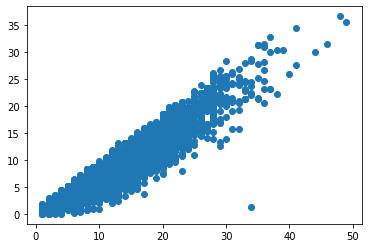

In [18]:
plt.scatter('Distance (KM)', 'Dist_calc (KM)', data= X_dummies)

In [19]:
X_dummies.drop(['Dist_calc (KM)'], axis=1, inplace=True)

## Missing Values

In [20]:
# investigate missing values and treat them accordingly

In [21]:
for col in X_dummies.columns:
    if X_dummies[col].count() <len(X_dummies[col]):
        print(col + ':' + str(X_dummies[col].count()))

Temperature:16835
Precipitation in millimeters:552


In [22]:
# The dataset have a total of 21201 observations
print('Precipitation is missing' + ':' + str((1-(552/21201))*100) + 'observations')
print('Temperature is missing only' + ':' + str((1-(16835/21201))*100) + 'observations')

# Missing values for temperature will be imputed, while precipitation will be deleted

Precipitation is missing:97.39634922880997observations
Temperature is missing only:20.5933682373473observations


In [23]:
#Dropping Precipitation
X_dummies.drop('Precipitation in millimeters', axis=1, inplace=True)

# Imputing missing values for temperature with the average temperature
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_dummies['Temperature'].values.reshape(len(X_dummies['Temperature']),1))
X_dummies['Temperature']= imputer.transform(X_dummies['Temperature'].values.reshape(len(X_dummies['Temperature']),1))


In [24]:
X_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Placement - Day of Month                21201 non-null  int64  
 1   Confirmation - Day of Month             21201 non-null  int64  
 2   Arrival at Pickup - Day of Month        21201 non-null  int64  
 3   Pickup - Day of Month                   21201 non-null  int64  
 4   Distance (KM)                           21201 non-null  int64  
 5   Temperature                             21201 non-null  float64
 6   Pickup Lat                              21201 non-null  float64
 7   Pickup Long                             21201 non-null  float64
 8   Destination Lat                         21201 non-null  float64
 9   Destination Long                        21201 non-null  float64
 10  No_Of_Orders                            21201 non-null  in

# Benchmark Model

In [25]:
y=np.array(y)
y=y.reshape(len(y),1)
y

array([[ 745],
       [1993],
       [ 455],
       ...,
       [2953],
       [1380],
       [2128]], dtype=int64)

In [26]:
# fit Linear model
#Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_dummies,y, test_size=0.2,random_state=40)

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train, y_train)
y_pred=lm.predict(x_test)

#Model Perfomance Validation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print( 'Rsquared :'  + str(r2_score(y_test, y_pred)))
print('RMSE :' + str(np.sqrt(mean_squared_error(y_test, y_pred))))
# Aim at having a RMSE of less than 780

#and cross validate perfomance

ValueError: setting an array element with a sequence.

In [ ]:
# Cross Validations

In [ ]:
from sklearn.model_selection import cross_validate

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
#combining the features and target variable for data visualisation
df=X_dummies.copy()
df['Time from Pickup to Arrival']=y
df.head()

In [ ]:
# plot histograms for numeric features - lookout for outliers and leverage points
#train_set['Time from Pickup to Arrival'].hist(bins=50)

fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(train_set['Time from Pickup to Arrival'], ax=ax)

In [ ]:
df['Time from Pickup to Arrival'].describe()
# The median value is 1369 seconds while the mean is 1559.9, the data has very large influencial values

Time from Pickup to Arrival is skewed to the right
There is also a second pick close to zero seconds

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(x='Time from Pickup to Arrival', data=df)

In [ ]:
# The plot above shows the posibility of outliers, there are very large numbers in our travel time variable
# The box plot uses inter-quartile range to detect outliers. Here, we first determine the quartiles Q1 and Q3.

#Interquartile range is given by (IQR) = Q3 — Q1
Q3= 2040
Q1= 882
IQR = Q3-Q1

Upperlimit = Q3+1.5* IQR

Lowerlimit = Q1-(1.5*IQR)
print(Upperlimit)
print(Lowerlimit)

#All the data is above the lower limit, however there are points that far exceeds the upper limit of 3777 seconds

In [ ]:
# plot histograms for categorical features - Lookout for too many levels that can be grouped together
#df['Pickup - Day of Month'].hist(bins=100)
#df['Placement - Day of Month  '].hist(bins=100
#df['Arrival at Pickup - Day of Month'].hist(bins=100
df['Confirmation - Day of Month'].hist(bins=100)                                
                                 
                                 





In [ ]:
def change_months(df,col):
    df['Weeks_Month_Cat']=np.nan
    for i in range(len(df[col])):
        if df[col][i]<=7:
            df['Weeks_Month_Cat'][i]='first week'
        elif df[col][i]<=14:
            df['Weeks_Month_Cat'][i]='second week'
        elif df[col][i]<=21:
            df['Weeks_Month_Cat'][i]='third week'
        else:
            df['Weeks_Month_Cat'][i]='last wee'
    return df['Weeks_Month_Cat']

In [ ]:
df['Confirmation_Month_Cat']=change_months(df,'Confirmation - Day of Month')
df['Placement_Month_Cat']=change_months(df,'Placement - Day of Month')
df['Arrival_at_Pick_up_Month_Cat']=change_months(df,'Arrival at Pickup - Day of Month')
df['Pickup_Month_Cat']=change_months(df,'Pickup - Day of Month')

In [ ]:
df.drop(['Confirmation - Day of Month','Placement - Day of Month','Arrival at Pickup - Day of Month','Pickup - Day of Month'],axis=1,
        inplace=True)


In [ ]:
df.columns

## Multivariate Analysis

In [ ]:
# analyse relationships between features (correlation and factor analysis)
g=sns.pairplot(df[['No_Of_Orders', 'Age', 'Average_Rating','Distance (KM)','Temperature','No_of_Ratings','Time from Pickup to Arrival']])
g.fig.set_size_inches(9,9)



In [ ]:
df.columns

In [ ]:
# check for collinearity and multi-collinearity

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True,cmap='plasma')

In [ ]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

In [ ]:
# All weekday variables(Pick up, confirmmation, etc) are correlated, will remove all other 3 variables, 
#Times are also highly correlated, only one variable will be left.
#Also days of the months variables

X_dummies.drop([ 'Placement - Day of Month', 'Confirmation - Day of Month','Arrival at Pickup - Day of Month','Confirmation - Weekday (Mo = 1)_2',
       'Confirmation - Weekday (Mo = 1)_3','Confirmation - Weekday (Mo = 1)_4','Confirmation - Weekday (Mo = 1)_5','Confirmation - Weekday (Mo = 1)_6',
       'Confirmation - Weekday (Mo = 1)_7','Arrival at Pickup - Weekday (Mo = 1)_2','Arrival at Pickup - Weekday (Mo = 1)_3','Arrival at Pickup - Weekday (Mo = 1)_4',
       'Arrival at Pickup - Weekday (Mo = 1)_5','Arrival at Pickup - Weekday (Mo = 1)_6','Arrival at Pickup - Weekday (Mo = 1)_7',  'Placement - Weekday (Mo = 1)_2', 
       'Placement - Weekday (Mo = 1)_3','Placement - Weekday (Mo = 1)_4', 'Placement - Weekday (Mo = 1)_5',
       'Placement - Weekday (Mo = 1)_6', 'Placement - Weekday (Mo = 1)_7','Arrival At Pickup - Time(AM/PM)_PM',
        'Placement - Time(AM/PM)_PM',
       'Confirmation - Time(AM/PM)_PM'],axis=1, inplace=True)

In [ ]:
# analyses relationship between features and target
plt.figure

plt.scatter(df['Distance (KM)'],'Time from Pickup to Arrival', data=df)

#sns.regplot((df['Distance (KM)']),'Time from Pickup to Arrival', data=df)

plt.show()

In [ ]:
plt.figure    
sns.jointplot('Temperature','Time from Pickup to Arrival', data=train_set)
sns.jointplot(np.log(train_set['Temperature']),'Time from Pickup to Arrival', data=train_set,)
plt.show

In [ ]:
grid = sns.FacetGrid(train_set, row='Platform Type', col='Personal or Business', height=2.0, aspect=3.0)
grid.map(plt.hist,'Time from Pickup to Arrival', bins=30)
grid.add_legend()
plt.show()

In [ ]:
train_set.groupby('Platform Type').count()['Time from Pickup to Arrival']
# Platform type 3 accounts for over 80% of the sample, while platform type 4 for acounts for approx 0.0% (20) of the total sample
# Platform type 3 will be compared to the rest of the platfofms
# Also from the above graph it seems like business customers use platform 3 the most, while personal customers use the other platforms

In [ ]:
grid = sns.FacetGrid(train_set, row='Pickup - Weekday (Mo = 1)', col='Personal or Business', height=2.0, aspect=3.0)
grid.map(plt.hist,'Time from Pickup to Arrival', bins=30)
grid.add_legend()
plt.show()

In [ ]:
grid = sns.FacetGrid(train_set, row='Pickup - Weekday (Mo = 1)', col='Personal or Business', height=2.0, aspect=3.0)
grid.map(plt.hist,'Time from Pickup to Arrival', bins=30)
grid.add_legend()
plt.show()

In [ ]:
#sns.jointplot('Average_Rating','No_of_Ratings', data=train_set)

#sns.jointplot('Average_Rating','Time from Pickup to Arrival', data=train_set)
sns.regplot('No_of_Ratings','Time from Pickup to Arrival', data=train_set)

In [ ]:
#sns.jointplot('Average_Rating','Time from Pickup to Arrival', data=train_set)
sns.jointplot('Age','Time from Pickup to Arrival', data=train_set)

**Benchmach model** After removing the highly correlated variables exposed by the visuals above

In [ ]:
# fit Linear model
#Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_dummies,y, test_size=0.2,random_state=40)

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train, y_train)
y_pred=lm.predict(x_test)

#Model Perfomance Validation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print( 'Rsquared :'  + str(r2_score(y_test, y_pred)))
lm_test=np.sqrt(mean_squared_error(y_test, y_pred))
lm_train=np.sqrt(mean_squared_error(y_train, lm.predict(x_train)))
print('RMSE :' + str(np.sqrt(mean_squared_error(y_test, y_pred))))
# Aim at having a RMSE of less than 780
# RMSE increased from 790 to 791 and R2 decreased from 35.5% to 35.37%
# These are small changes, therefore the variavbles removed had very litte explanatory power while causing multicolinearity

# Feature Engineering

In [ ]:
# investigate non linearity
X_nonlnr=X_dummies.copy()

#Temperature is transformed using log, as it seems to be non linear with y
X_nonlnr['log_tempreture']=np.log(X_nonlnr['Temperature'])

#Transforming platform type to two catergories as mentioned
X_nonlnr['Platform_type']=X['Platform Type']

X_nonlnr['Platform_type_3_other(0)']=np.nan
for i in range(len(X_nonlnr['Platform_type'])):
    if X_nonlnr['Platform_type'][i]==3:
          X_nonlnr['Platform_type_3_other(0)'][i]=int(1)
    else:
        X_nonlnr['Platform_type_3_other(0)'][i]=int(0)
        
X_nonlnr.drop(['Platform Type_4', 'Platform Type_2', 'Platform Type_3','Temperature', 'Platform_type'], axis=1, inplace=True)


In [ ]:
# investigate feature interactions and synergy

X_nonlnr[['Personal or Business_Personal', 'Platform_type_3_other(0)']].head()

X_nonlnr['Business_1_Personal_0']=np.nan
for i in range(len(X_nonlnr['Business_1_Personal_0'])):
    if X_nonlnr['Personal or Business_Personal'][i]==0:
        X_nonlnr['Business_1_Personal_0'][i]=1
    else:
         X_nonlnr['Business_1_Personal_0'][i]=0

#Interaction Variable (Business customer using platform 3 versus other customers)
X_nonlnr['Business_Platform_3']= X_nonlnr['Business_1_Personal_0']* X_nonlnr['Platform_type_3_other(0)']
X_nonlnr.columns

In [ ]:
# fit a model adjusted for non linearity
#Splitting the data into training and testing datasets
xnl_train, xnl_test, ynl_train, ynl_test=train_test_split(X_nonlnr,y, test_size=0.2,random_state=40)

#Fitting the model
nlm=LinearRegression()
nlm.fit(xnl_train, ynl_train)
ynl_pred=nlm.predict(xnl_test)

#Model Perfomance Validation
print( 'Rsquared :'  + str(r2_score(ynl_test, ynl_pred)))
print('RMSE :' + str(np.sqrt(mean_squared_error(ynl_test, ynl_pred))))
# Aim at having a RMSE of less than 780

#The R2 and RMSE did not improve with feature enginearing, 
# That might be due to decreased number of variables. 

In [ ]:
X_nonlnr[['Business_Platform_3','Business_1_Personal_0','Platform_type_3_other(0)']].head()

**Feature Scaling**

In [ ]:
x_train.columns

In [ ]:
train_scale=x_train[['No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Pickup - Day of Month', 'Distance (KM)', 'Temperature']]

test_scale=x_test[['No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Pickup - Day of Month', 'Distance (KM)', 'Temperature']]

In [ ]:
dummies_train=x_train[['Platform Type_2', 'Platform Type_3', 'Platform Type_4',
       'Personal or Business_Personal', 'Pickup - Weekday (Mo = 1)_2',
       'Pickup - Weekday (Mo = 1)_3', 'Pickup - Weekday (Mo = 1)_4',
       'Pickup - Weekday (Mo = 1)_5', 'Pickup - Weekday (Mo = 1)_6',
       'Pickup - Weekday (Mo = 1)_7', 'Pickup - Time(AM/PM)_PM']]

dummies_test=x_test[['Platform Type_2', 'Platform Type_3', 'Platform Type_4',
       'Personal or Business_Personal', 'Pickup - Weekday (Mo = 1)_2',
       'Pickup - Weekday (Mo = 1)_3', 'Pickup - Weekday (Mo = 1)_4',
       'Pickup - Weekday (Mo = 1)_5', 'Pickup - Weekday (Mo = 1)_6',
       'Pickup - Weekday (Mo = 1)_7', 'Pickup - Time(AM/PM)_PM']]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y= StandardScaler()
x_train_scaled=sc_x.fit_transform(train_scale)

y_train_scaled=sc_y.fit_transform(y_train)
x_test_scaled=sc_x.transform(test_scale)

scaled_x_train=pd.DataFrame(x_train_scaled,columns= train_scale.columns,index=dummies_train.index)
scaled_x_test=pd.DataFrame(x_test_scaled,columns= test_scale.columns,index=dummies_test.index)
x_train_scaled_all=scaled_x_train.join(dummies_train)
x_test_scaled_all=scaled_x_test.join(dummies_test)


In [ ]:
#x_train_sc, x_test_sc, y_train_sc, y_test_sc=train_test_split(X_scaled,y_scaled, test_size=0.2,random_state=40)
lm_sc=LinearRegression()
lm_sc.fit(x_train_scaled_all, y_train_scaled)
y_pred_lmsc=sc_y.inverse_transform(lm_sc.predict(x_test_scaled_all))

#Model Perfomance Validation
print( 'Rsquared :'  + str(r2_score(y_test, y_pred_lmsc)))
print('RMSE :' + str(np.sqrt(mean_squared_error(y_test, y_pred_lmsc))))

In [ ]:
#cross validation

# Feature Selection

In [ ]:
# L1 and L2 Regularisation
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_scaled_all, y_train_scaled)
ypred_ridge =sc_y.inverse_transform (ridge.predict(x_test_scaled_all))

print('Ridge MSE')

ridge_test=np.sqrt(mean_squared_error(y_test, ypred_ridge))
ridge_train=np.sqrt(mean_squared_error(y_train, sc_y.inverse_transform (ridge.predict(x_train_scaled_all))))

In [ ]:
from sklearn.linear_model import Lasso
# create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)
# train the LASSO model
lasso.fit(x_train_scaled_all, y_train_scaled)

y_pred_lasso=sc_y.inverse_transform (lasso.predict(x_test_scaled_all))
lasso_test=np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_train=np.sqrt(mean_squared_error(y_train, sc_y.inverse_transform (lasso.predict(x_train_scaled_all))))
print('R2:', r2_score(y_test, y_pred_lasso))

In [ ]:
coeff = pd.DataFrame(lasso.coef_, X_dummies.columns, columns=['Coefficient'])
coeff

#From Lasso regression the following variables caan be dropped as their coefficients shrinked to zero
#[Age,Pickup - Day of Month,Temperature,Platform Type_2,Platform Type_3,Platform Type_4, Personal or Business_Personal,
#Pickup - Weekday (Mo = 1)_5,Pickup - Weekday (Mo = 1)_6,Pickup - Weekday (Mo = 1)_7,
#Pickup - Weekday (Mo = 1)_2,Pickup - Weekday (Mo = 1)_3,Pickup - Weekday (Mo = 1)_4]

# Models with outliers removed

In [ ]:
# minimal data preprocessing (just enough to build base model)
#Removing Outliers
df_outliers_re= X_dummies.copy()
df_outliers_re['Time from Pickup to Arrival']=y

indexNames = df_outliers_re[(df_outliers_re['Time from Pickup to Arrival'] <30) & (df_outliers_re['Distance (KM)']>1)].index
indexNames2 = df_outliers_re[df_outliers_re['Time from Pickup to Arrival'] >4000].index

df_outliers_re.drop(indexNames, inplace=True)
df_outliers_re.drop(indexNames2, inplace=True)
# Target and Feature variables without outliers
X2=df_outliers_re.drop('Time from Pickup to Arrival', axis=1)
y2=df_outliers_re['Time from Pickup to Arrival']
y2=np.array(y2).reshape(len(y2),1)

#Removing outliers in the non linear model
df2_outliers_re= X_nonlnr.copy()
df2_outliers_re['Time from Pickup to Arrival']=y
df2_outliers_re.drop(indexNames, inplace=True)
df2_outliers_re.drop(indexNames2, inplace=True)

# Target and Feature variables without outliers
X3=df2_outliers_re.drop('Time from Pickup to Arrival', axis=1)
y3=df2_outliers_re['Time from Pickup to Arrival']
y3=np.array(y2).reshape(len(y3),1)


In [ ]:
# fit Linear model without outliers
#Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2=train_test_split(X2,y2, test_size=0.2,random_state=40)

from sklearn.linear_model import LinearRegression
lm_no=LinearRegression()
lm_no.fit(x_train2, y_train2)
y_pred2=lm_no.predict(x_test2)

#Model Perfomance Validation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print( 'Rsquared :'  + str(r2_score(y_test2, y_pred2)))

lm_nooutlier_train=np.sqrt(mean_squared_error(y_train2, lm_no.predict(x_train2)))
lm_nooutlier_test=np.sqrt(mean_squared_error(y_test2, y_pred2))
# Aim at having a RMSE of less than 780
print(lm_nooutlier_train)
print(lm_nooutlier_test)
#and cross validate perfomance

In [ ]:
#fit non Linear model without outliers
#Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3=train_test_split(X3,y3, test_size=0.2,random_state=40)

from sklearn.linear_model import LinearRegression
nlm_no=LinearRegression()
nlm_no.fit(x_train2, y_train3)
y_pred3=nlm_no.predict(x_test3)

#Model Perfomance Validation
print( 'Rsquared :'  + str(r2_score(y_test3, y_pred3)))
np.sqrt(mean_squared_error(y_test3, y_pred3))

#Even after removing outliers this model with transformed features performs worse that the linear model, after removing outliers

In [ ]:
# Scalling the features of the dataset without outliers
train2_scale=x_train2[['No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Pickup - Day of Month', 'Distance (KM)', 'Temperature']]

test2_scale=x_test2[['No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Pickup - Day of Month', 'Distance (KM)', 'Temperature']]

dummies_train2=x_train2[['Platform Type_2', 'Platform Type_3', 'Platform Type_4',
       'Personal or Business_Personal', 'Pickup - Weekday (Mo = 1)_2',
       'Pickup - Weekday (Mo = 1)_3', 'Pickup - Weekday (Mo = 1)_4',
       'Pickup - Weekday (Mo = 1)_5', 'Pickup - Weekday (Mo = 1)_6',
       'Pickup - Weekday (Mo = 1)_7', 'Pickup - Time(AM/PM)_PM']]

dummies_test2=x_test2[['Platform Type_2', 'Platform Type_3', 'Platform Type_4',
       'Personal or Business_Personal', 'Pickup - Weekday (Mo = 1)_2',
       'Pickup - Weekday (Mo = 1)_3', 'Pickup - Weekday (Mo = 1)_4',
       'Pickup - Weekday (Mo = 1)_5', 'Pickup - Weekday (Mo = 1)_6',
       'Pickup - Weekday (Mo = 1)_7', 'Pickup - Time(AM/PM)_PM']]



In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x2= StandardScaler()
sc_y2= StandardScaler()
x_train_scaled2=sc_x2.fit_transform(train2_scale)

y_train_scaled2=sc_y2.fit_transform(y_train2)
x_test_scaled2=sc_x2.transform(test2_scale)

scaled_x2_train=pd.DataFrame(x_train_scaled2,columns= train2_scale.columns,index=dummies_train2.index)
scaled_x2_test=pd.DataFrame(x_test_scaled2,columns= test2_scale.columns,index=dummies_test2.index)
x2_train_scaled_all=scaled_x2_train.join(dummies_train2)
x2_test_scaled_all=scaled_x2_test.join(dummies_test2)

In [ ]:
# fit Linear model without outliers and scaled features 
lmsc_no=LinearRegression()
lmsc_no.fit(x2_train_scaled_all, y_train_scaled2)
ysc_pred_no=sc_y2.inverse_transform(lmsc_no.predict(x2_test_scaled_all))

#Model Perfomance Validation
print( 'Rsquared :'  + str(r2_score(y_test2, ysc_pred_no)))

lmscaled_no_outlier_train=round(np.sqrt(mean_squared_error(y_train2, sc_y2.inverse_transform(lmsc_no.predict(x2_train_scaled_all)))),0)
lmscaled_no_outlier_test=round(np.sqrt(mean_squared_error(y_test2, ysc_pred_no)),0)

print(lmscaled_no_outlier_train)
print(lmscaled_no_outlier_test)

In [ ]:
ridge_no = Ridge()
ridge_no.fit(x2_train_scaled_all, y_train_scaled2)
y_ridge_no =sc_y2.inverse_transform (ridge_no.predict(x2_test_scaled_all))

print('Ridge MSE')
ridge_no_outlier_train=round(np.sqrt(mean_squared_error(y_train2, sc_y2.inverse_transform (ridge_no.predict(x2_train_scaled_all)))),0)
ridge_no_outlier_test= round(np.sqrt(mean_squared_error(y_test2, y_ridge_no)),0)

print(ridge_no_outlier_train)
print(ridge_no_outlier_test)

In [ ]:
lasso_no = Lasso()
lasso_no.fit(x2_train_scaled_all, y_train_scaled2)
y_lasso_no =sc_y2.inverse_transform (ridge_no.predict(x2_test_scaled_all))

print('Lasso MSE')
lasso_nooutlier_train =np.sqrt( mean_squared_error(y_train2, sc_y2.inverse_transform (lasso_no.predict(x2_train_scaled_all))))
lasso_nooutlier_test  =np.sqrt(mean_squared_error(y_test2, y_lasso_no))

print(lasso_nooutlier_train )
print(lasso_nooutlier_test)

In [ ]:
x2_train_scaled_all.columns

# Variable Selection 
* backward eliminations

In [ ]:
df_outliers_re.corr()
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_outliers_re.corr(), xnames = df_outliers_re.corr().columns, ax = ax);

#Age and number of orders are highly correlated
# Number of orders and number oratings are also correlated

In [ ]:
# Calculate correlations between predictor variables and the response variable
corrs = df_outliers_re.corr()['Time from Pickup to Arrival'].sort_values(ascending=False)
corrs

# Nomber of ratings is highly correlated with time from pick up to arrrival,
# therefore number of orders can be removed since is is correlated with both age and number of ratings.

In [ ]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Time from Pickupt to Arrival']
for col in column_titles:
    p_val = round(pearsonr(df_outliers_re[col], df_outliers_re['Time from Pickup to Arrival'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

#Age,number of orders and number of ratings have high p_values

In [ ]:
# The dependent variable remains the same:
y_data =df_outliers_re['Time from Pickup to Arrival']  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_outliers_re[X_names]

In [ ]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

In [ ]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

# NO correlation of above 0.9 oir less -0.9. all the variables are kept

In [ ]:
df_outliers_re.columns=['No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Pickup_Day_of_Month', 'Distance_KM', 'Temperature',
       'Platform_Type_2', 'Platform_Type_3', 'Platform_Type_4',
       'Personal_or_Business_Personal', 'Pickup_Weekday_2',
       'Pickup_Weekday_3', 'Pickup_Weekday_4',
       'Pickup_Weekday_5', 'Pickup_Weekday_6',
       'Pickup_Weekday_7', 'Pickup_Time_AM_0_PM_1',
       'Time_from_Pickup_to_Arrival']

In [ ]:
# Lets take a new subset of our potential independent variables
X_corr_names = df_outliers_re.drop('Time_from_Pickup_to_Arrival', axis=1).columns
y_name='Time_from_Pickup_to_Arrival'

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

In [ ]:
# Fit the OLS model using the model dataframe
from statsmodels.formula.api import ols
model=ols(formula=formula_str, data=df_outliers_re)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

In [ ]:
#from the above model, 
#Number of orders, teperature and pickup day of the month are not significant, will use backward selection to remove ach of them
# removing temperature
X_corr_names = df_outliers_re.drop(['Time_from_Pickup_to_Arrival', 'Temperature'], axis=1).columns

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
# Fit the OLS model using the model dataframe
from statsmodels.formula.api import ols
model1=ols(formula=formula_str, data=df_outliers_re)
fitted = model1.fit()

# Display the fitted summary
print(fitted.summary())


In [ ]:
#from the above model, 
#Number of orders, teperature and pickup day of the month are not significant, will use backward elimination to remove ach of them
# removing temperature
X_corr_names = df_outliers_re.drop(['Time_from_Pickup_to_Arrival', 'Temperature','Pickup_Day_of_Month' ], axis=1).columns

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
# Fit the OLS model using the model dataframe
from statsmodels.formula.api import ols
model2=ols(formula=formula_str, data=df_outliers_re)
fitted = model2.fit()

# Display the fitted summary
print(fitted.summary())

In [ ]:
#from the above model, 
#Number of orders, teperature and pickup day of the month are not significant, will use backward elimination to remove ach of them
# removing temperature
X_corr_names = df_outliers_re.drop(['Time_from_Pickup_to_Arrival', 'Temperature','Pickup_Day_of_Month', 'No_of_Ratings' ],
                                   axis=1).columns

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
# Fit the OLS model using the model dataframe
from statsmodels.formula.api import ols
model2=ols(formula=formula_str, data=df_outliers_re)
fitted = model2.fit()

# Display the fitted summary
print(fitted.summary())

In [ ]:
#from the above model, 
#Number of orders, teperature and pickup day of the month are not significant, will use backward elimination to remove ach of them
# removing temperature
X_corr_names = df_outliers_re.drop(['Time_from_Pickup_to_Arrival', 'Temperature','Pickup_Day_of_Month', 'No_of_Ratings',
                                   'Platform_Type_2','Platform_Type_3','Platform_Type_4'],
                                   axis=1).columns

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
# Fit the OLS model using the model dataframe
from statsmodels.formula.api import ols
model2=ols(formula=formula_str, data=df_outliers_re)
fitted = model2.fit()

# Display the fitted summary
print(fitted.summary())

In [ ]:
# After removing number of ratings, number of orders became significant
# Above is the final model

In [ ]:
# Use SKLearn to train and run the final model

X_final= df_outliers_re.drop(['Time_from_Pickup_to_Arrival', 'Temperature','Pickup_Day_of_Month', 'No_of_Ratings',
                                   'Platform_Type_2','Platform_Type_3','Platform_Type_4' ],
                                   axis=1)
y_final=df_outliers_re['Time_from_Pickup_to_Arrival']

from sklearn.model_selection import train_test_split
x_trainf, x_testf, y_trainf, y_testf=train_test_split(X_final,y_final, test_size=0.2,random_state=40)

from sklearn.linear_model import LinearRegression
flm_no=LinearRegression()
flm_no.fit(x_trainf, y_trainf)
y_predf=flm_no.predict(x_testf)

#Model Perfomance Validation
print( 'Rsquared :'  + str(r2_score(y_testf, y_predf)))

flm_train=np.sqrt(mean_squared_error(y_trainf, flm_no.predict(x_trainf)))
flm_test= np.sqrt(mean_squared_error(y_testf, y_predf))


# Ensembled Methods

In [ ]:
# Random forests and feature importance
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)
regressor.fit(x_train, y_train)
yrd_pred = regressor.predict(x_test)
r2_score(y_test, yrd_pred)
rf_test= np.sqrt( mean_squared_error(y_test, yrd_pred))
rf_train= np.sqrt( mean_squared_error(y_train, regressor.predict(x_train)))

rf_train



In [ ]:
# Random forests without outliers and feature importance

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 150, random_state = 0)
rf.fit(x_train2, y_train2)
yrd_no_pred = rf.predict(x_test2)
r2_score(y_test2, yrd_no_pred)
rf_nooutlier_train=np.sqrt( mean_squared_error(y_train2,rf.predict(x_train2)))
rf_nooutlier_test=np.sqrt( mean_squared_error(y_test2,yrd_no_pred))





In [ ]:
# fit multiple models and do hyper-parameter tuning
#withoutliers

#Ploting RMSE without ouliers

p=[lm_test, lm_test]
m=[ridge_train,ridge_test]
v=[lasso_train,lasso_train]
r=[rf_train, rf_test]
#rf_nooutlier
x=['train', 'test']
#plt.plot(x,y)
plt.plot(x,p, label='OLS', )
plt.plot(x,m, label='Ridge')
plt.plot(x,v, label='Lasso')
plt.plot(x,r, label='Random forest')

plt.xlabel('training versus testing samples')
plt.ylabel('RMSE')

plt.title('RMSE comparison')
plt.legend()
plt.show()


* OLS is performing better than Lasso and Random forest
* Random forest is overffiting the training data and can not generalise to unseen data


# Model Selection 

In [ ]:
# fit multiple models and do hyper-parameter tuning
#withoutliers

#Ploting RMSE without ouliers

p=[flm_train,flm_test]
m=[ridge_no_outlier_train,ridge_no_outlier_test]
v=[lasso_nooutlier_train,lasso_nooutlier_test]
r=[rf_nooutlier_train, rf_nooutlier_test]
#rf_nooutlier
x=['train', 'test']
#plt.plot(x,y)
plt.plot(x,p, label='OLS', )
plt.plot(x,m, label='Ridge')
plt.plot(x,v, label='Lasso')
plt.plot(x,r, label='Random forest')

plt.xlabel('training versus testing samples')
plt.ylabel('RMSE')

plt.title('RMSE comparison without outliers')
plt.legend()
plt.show()


* After outliers were removed, all models perfomed better
* OLS is perfoming exactly the same as Ridge model
* OLS has the best fit. 